<style type="text/css">
table td{
border:none;
}
</style>

<table>
    <tr>
        <td width=15%><img src="../img/logoIGE_Color_Light.jpg"></img></td>
        <td>
            <center>
                <h1>Machine Learning for prediciting RX localization</h1> <br>
                May - July 2022 <br>
                IGE internship
            </center>
            Renan MANCEAUX <br>
            Supervisor :<br>
            Thomas CHAUVE
        </td>
        <td width=20%><img src="../img/logo_UGA_imag.png"></img></td>
    </tr>
</table>

<center><h1> Machine learning : Testing Models </h1></center>

----------------------------

<center> <h1> Simple model reference </h1> </center>

We calculate recall and specificity associated to a simple model based on a threshold on dist2GB or dist2TJ value of pixel, i.e.

For $d \in [0 ; max(dist2GB)]$ 

$$ RX_{pred} = 
\left\{
    \begin{array}{ll}
        0 & if & dist2GB > d \\
        1 & if & dist1GB \leq d
    \end{array}
\right\}
$$

Idem for dist2TJ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append("../")
import utils

from tqdm.notebook import tqdm
from sklearn import metrics

### Loading data

In [7]:
CI02 = utils.load_data("../data/for_learning_plus/CI02.npy")
CI04 = utils.load_data("../data/for_learning_plus/CI04.npy")
CI06 = utils.load_data("../data/for_learning_plus/CI06.npy")
CI09 = utils.load_data("../data/for_learning_plus/CI09.npy")
CI21 = utils.load_data("../data/for_learning_plus/CI21.npy")

### Split Dataset

In [8]:
# Test sets
X1 = CI02.loc[:,CI02.columns != 'Y'] 
X2 = CI04.loc[:,CI04.columns != 'Y'] 
X3 = CI06.loc[:,CI06.columns != 'Y'] 
X4 = CI09.loc[:,CI09.columns != 'Y'] 
X5 = CI21.loc[:,CI21.columns != 'Y'] 

y1 = CI02['Y']
y2 = CI04['Y']
y3 = CI06['Y']
y4 = CI09['Y']
y5 = CI21['Y']

names = ["CI02","CI04","CI06","CI09","CI21"]
vars = [X1,X2,X3,X4,X5]
group = [y1,y2,y3,y4,y5]


### Eval dist2GB by experiment

In [36]:
for k in range(len(group)):
    rec = []
    spec = []
    for i in tqdm(range(int(max(round(vars[k].dist2GB))))):
        y_pred = vars[k].dist2GB < i
        y_pred = y_pred.astype(int)
        cm = metrics.confusion_matrix(group[k], y_pred)
        rec.append(metrics.recall_score(group[k], y_pred))
        spec.append(cm[0,0] / (cm[0,0] + cm[0,1]))


    results = [rec,spec]

    np.savetxt("../../RUN_GRICAD/res/compare_GB_threshold_"+ names[k] +"_res.txt",results)

  0%|          | 0/69 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

### Eval dist2TJ by experiment

In [37]:
for k in range(len(group)):
    rec = []
    spec = []
    for i in tqdm(range(int(max(round(vars[k].dist2TJ))))):
        y_pred = vars[k].dist2TJ < i
        y_pred = y_pred.astype(int)
        cm = metrics.confusion_matrix(group[k], y_pred)
        rec.append(metrics.recall_score(group[k], y_pred))
        spec.append(cm[0,0] / (cm[0,0] + cm[0,1]))


    results = [rec,spec]

    np.savetxt("../../RUN_GRICAD/res/compare_TJ_threshold_"+ names[k] +"_res.txt",results)

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/111 [00:00<?, ?it/s]

  0%|          | 0/93 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

### Plotting ROC curve

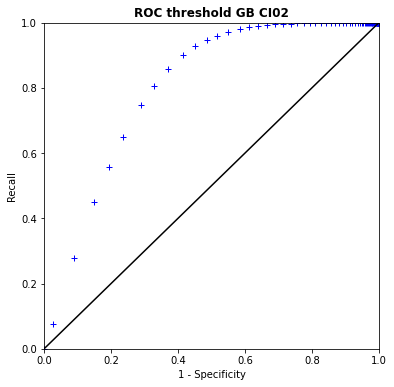

In [21]:
res = np.loadtxt("../../RUN_GRICAD/res/compare_GB_threshold_CI02_res.txt")
rec = res[0]
spec = res[1]

plt.figure(figsize=(6,6))
plt.plot(1-spec,rec,"b+")
plt.plot([0,1],[0,1],"k")
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC threshold GB CI02',fontweight='bold')
plt.ylabel('Recall')
plt.xlabel('1 - Specificity')
plt.show()

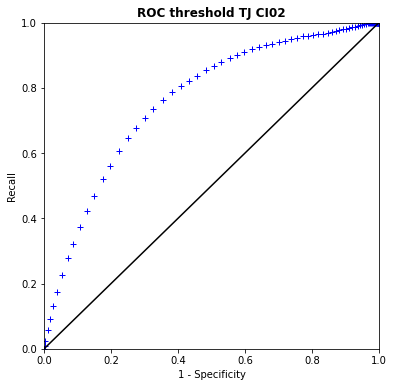

In [22]:
res = np.loadtxt("../../RUN_GRICAD/res/compare_TJ_threshold_CI02_res.txt")
rec = res[0]
spec = res[1]

plt.figure(figsize=(6,6))
plt.plot(1-spec,rec,"b+")
plt.plot([0,1],[0,1],"k")
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC threshold TJ CI02',fontweight='bold')
plt.ylabel('Recall')
plt.xlabel('1 - Specificity')
plt.show()

### Eval for all experiments

In [43]:
X = pd.concat((X1,X2,X3,X4,X5))
y = pd.concat((y1,y2,y3,y4,y5))

In [44]:
rec = []
spec = []
for i in tqdm(range(int(max(round(X.dist2GB))))):
    y_pred = X.dist2GB < i
    y_pred = y_pred.astype(int)
    cm = metrics.confusion_matrix(y, y_pred)
    rec.append(metrics.recall_score(y, y_pred))
    spec.append(cm[0,0] / (cm[0,0] + cm[0,1]))


results = [rec,spec]

np.savetxt("../../RUN_GRICAD/res/compare_GB_threshold_all_res.txt",results)

  0%|          | 0/83 [00:00<?, ?it/s]

In [46]:
rec = []
spec = []
for i in tqdm(range(int(max(round(X.dist2TJ))))):
    y_pred = X.dist2TJ < i
    y_pred = y_pred.astype(int)
    cm = metrics.confusion_matrix(y, y_pred)
    rec.append(metrics.recall_score(y, y_pred))
    spec.append(cm[0,0] / (cm[0,0] + cm[0,1]))


results = [rec,spec]

np.savetxt("../../RUN_GRICAD/res/compare_TJ_threshold_all_res.txt",results)

  0%|          | 0/123 [00:00<?, ?it/s]

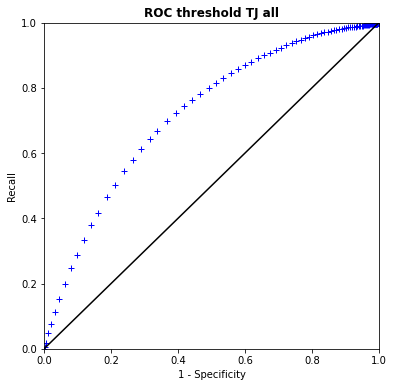

In [24]:
res = np.loadtxt("../../RUN_GRICAD/res/compare_TJ_threshold_all_res.txt")
rec = res[0]
spec = res[1]

plt.figure(figsize=(6,6))
plt.plot(1-spec,rec,"b+")
plt.plot([0,1],[0,1],"k")
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC threshold TJ all',fontweight='bold')
plt.ylabel('Recall')
plt.xlabel('1 - Specificity')
plt.show()

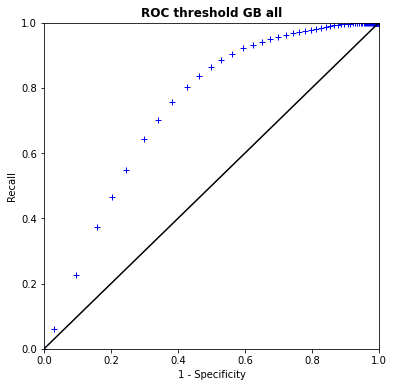

In [25]:
res = np.loadtxt("../../RUN_GRICAD/res/compare_GB_threshold_all_res.txt")
rec = res[0]
spec = res[1]

plt.figure(figsize=(6,6))
plt.plot(1-spec,rec,"b+")
plt.plot([0,1],[0,1],"k")
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC threshold GB all',fontweight='bold')
plt.ylabel('Recall')
plt.xlabel('1 - Specificity')
plt.show()